<center><h1><b>Quora Insincere Questions Classification Using Neural Networks and Deep Learning Models</b></h1></center>


Outline:
1. Dowload data from Kaggle to google Colab

2. Prepare the data for Modeling using the TF-IDF Technique

3. Train a deep learning model using `PyTorch` package

## Download Data from Kaggle

In [ ]:
!ls

data  kaggle.json  sample_data	submission.csv


In [ ]:
!pwd

/content


In [ ]:
import os

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data

train.csv: Skipping, found more recently modified local copy (use --force to force download)
test.csv: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
train_fname = 'data/train.csv.zip'
test_fname = 'data/test.csv.zip'
sample_fname = 'data/sample_submission.csv.zip'

In [ ]:
import pandas as pd

In [ ]:
raw_df = pd.read_csv(train_fname)
test_df = pd.read_csv(test_fname)
sub_df = pd.read_csv(sample_fname)

In [ ]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [ ]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [ ]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [ ]:
raw_df.sample(10)

,qid,question_text,target
744063,91bd9e683302981889cd,How can I get order on contentmart.com?,0
925767,b56c16ebbc70d443f7ba,How do I host my WordPress site on DreamHost i...,0
371112,48c390211aaa9e56e4a9,How can I get wife like Jacqueline or Shraddha...,0
726562,8e445ed7ab7b136e5b65,What were the very best and worst film sequels...,0
570973,6fe1932410994273b05e,Where can you buy legal marijuana in Californi...,0
388969,4c32d3772bfe858ee6e6,Why do college men like ripping farts so much?,0
398382,4e0973616c988b2b40f2,What's the iOS Cisco version for the CCNA R&S ...,0
459446,59fbb29e521bb8973282,Is there any chance for socialism to succeed i...,0
5629,0117e9bf341f481bf7f9,Shouldn't the US be offering MORE refuge to th...,0
504828,62d8dfac78f1519485e0,How many proffes to students?,0


## Data Exploration

In [ ]:
SAMPLE_SIZE = 100_000
sample_df = raw_df.sample(SAMPLE_SIZE)

<ipython-input-58-770db80b0b02>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=raw_df, palette=colors)


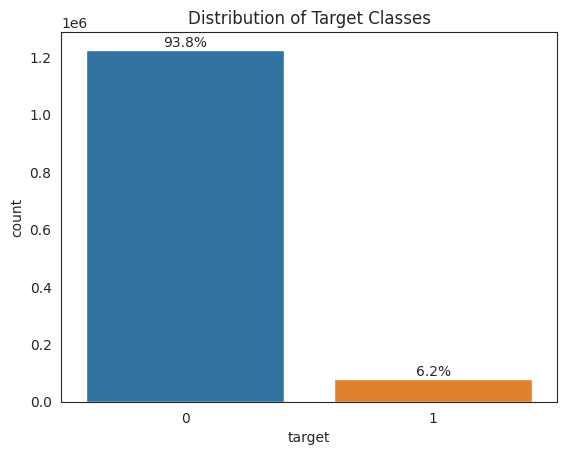

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Plot with custom colors
colors = ['#1f77b4', '#ff7f0e']
ax = sns.countplot(x='target', data=raw_df, palette=colors)

# Title
plt.title('Distribution of Target Classes')


# Calculate percentages and annotate bars
total = len(raw_df)
for p in ax.patches:
    count = p.get_height()
    percentage = f'{100 * count / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()


In [ ]:
# Add character count column if not already added
raw_df['char_count'] = raw_df['question_text'].apply(len)

<ipython-input-190-99986cf4a1b4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='char_count', data=raw_df, palette='Set2')


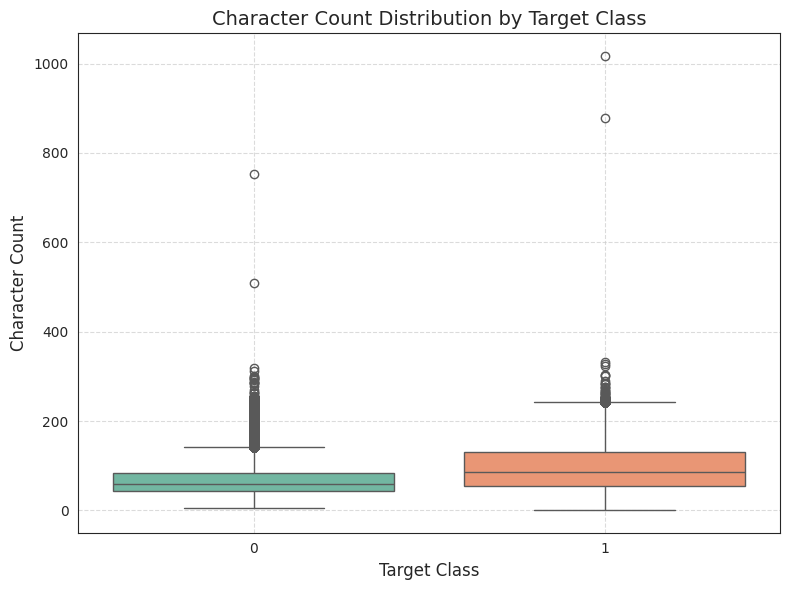

In [ ]:
# Add word count column
raw_df['word_count'] = raw_df['question_text'].apply(lambda x: len(x.split()))

import seaborn as sns
import matplotlib.pyplot as plt

# Create the box plot with distinct colors for each class
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='char_count', data=raw_df, palette='Set2')

# Improve plot titles and labels
plt.title('Character Count Distribution by Target Class', fontsize=14)
plt.xlabel('Target Class', fontsize=12)
plt.ylabel('Character Count', fontsize=12)

# Optional: customize ticks and add gridlines
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


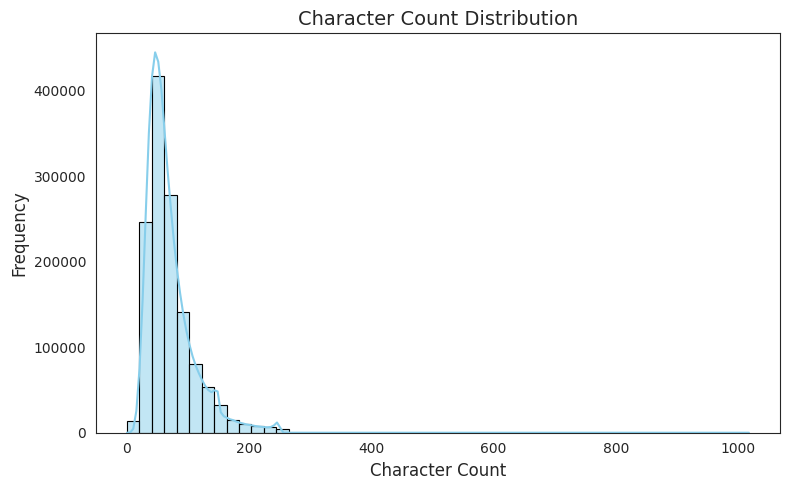

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Remove gridlines by using a non-grid style
sns.set_style("white")

# Create the histogram with KDE
plt.figure(figsize=(8, 5))
sns.histplot(raw_df['char_count'], bins=50, kde=True, color='skyblue', edgecolor='black')

# Improve titles and axis labels
plt.title('Character Count Distribution', fontsize=14)
plt.xlabel('Character Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customize ticks (no grid)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()



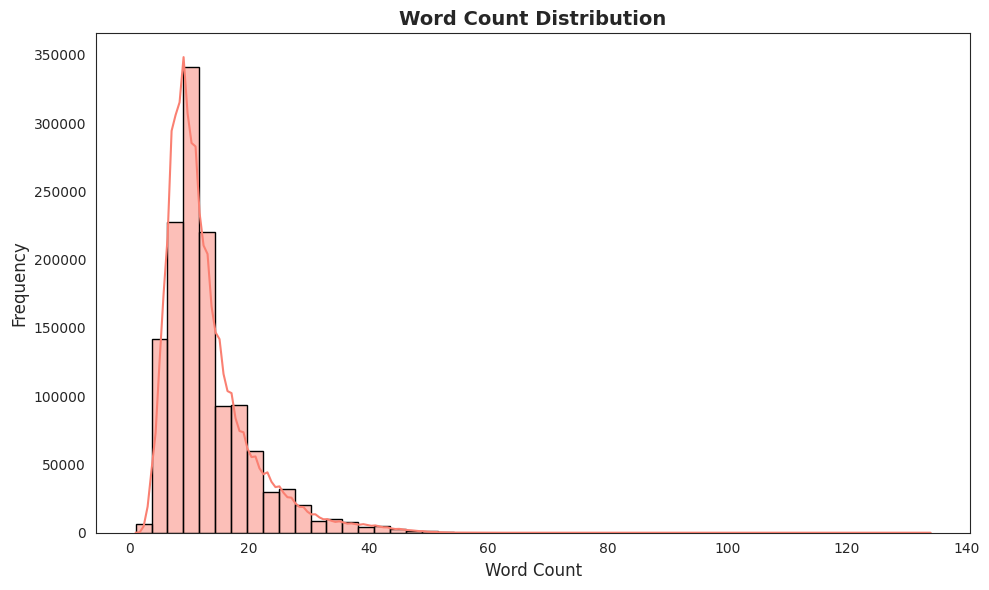

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a clean, professional style
sns.set_style("white")  # Removes gridlines

# Create the histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(raw_df['word_count'], bins=50, kde=True, color='salmon', edgecolor='black')

# Add title and axis labels with formatting
plt.title('Word Count Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Word Count', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Customize ticks
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Layout adjustment
plt.tight_layout()
plt.show()


In [ ]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def get_top_n_words(corpus, n=None):
    words = ' '.join(corpus).lower().split()
    words = [word for word in words if word not in stop_words]
    return Counter(words).most_common(n)

top_words = get_top_n_words(sample_df['question_text'], n=20)
print(top_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('get', 4824), ('best', 4775), ('would', 4651), ('people', 3709), ('like', 3328), ('good', 2838), ('one', 2283), ('make', 2148), ('think', 1969), ('many', 1849), ('much', 1651), ('someone', 1626), ('use', 1537), ('know', 1454), ('want', 1428), ('way', 1416), ('become', 1337), ('find', 1335), ('take', 1313), ('ever', 1311)]


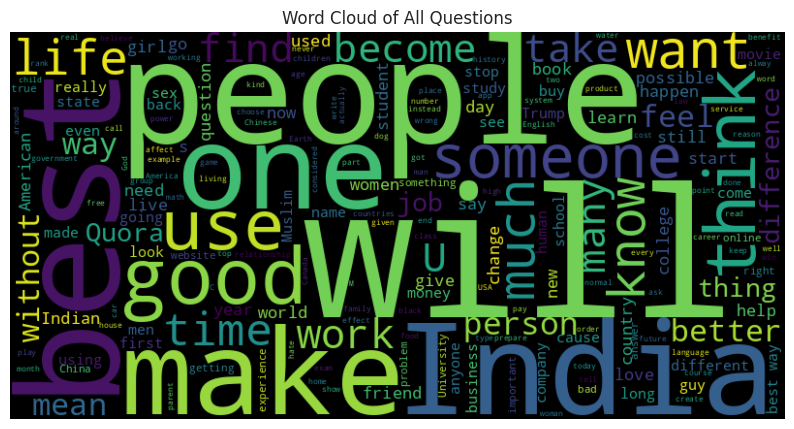

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400).generate(' '.join(sample_df['question_text']))
plt.figure(figsize=(10, 11))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Questions")
plt.show()


In [ ]:
raw_df.question_mark = sample_df['question_text'].apply(lambda x: '?' in x)
raw_df

<ipython-input-66-d02c7e5e2bf1>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  raw_df.question_mark = sample_df['question_text'].apply(lambda x: '?' in x)


,qid,question_text,target,char_count,word_count
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0,72,13
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0,81,16
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0,67,10
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0,57,9
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0,77,15
...,...,...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0,93,17
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0,91,19
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0,25,4
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0,71,13


<ipython-input-67-41f5af174926>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='target', y='question_mark', data=raw_df, palette='Set2')


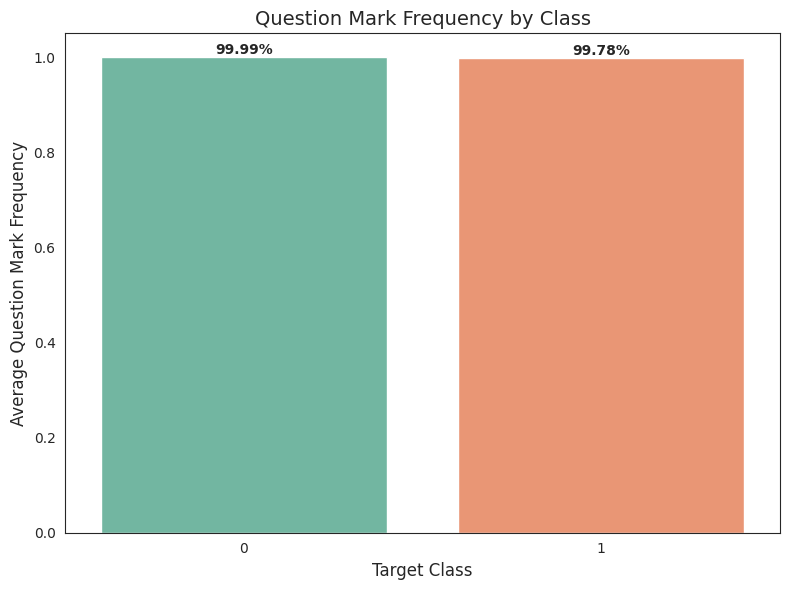

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Presence of question mark
raw_df['question_mark'] = raw_df['question_text'].apply(lambda x: '?' in x)

# Remove gridlines by using a non-grid style
sns.set_style("white")

# Create the figure
plt.figure(figsize=(8, 6))

# Create the barplot with color differentiation
ax = sns.barplot(x='target', y='question_mark', data=raw_df, palette='Set2')

# Set plot title and labels
plt.title('Question Mark Frequency by Class', fontsize=14)
plt.xlabel('Target Class', fontsize=12)
plt.ylabel('Average Question Mark Frequency', fontsize=12)

# Annotate bars with percentages
for p in ax.patches:
    value = p.get_height()
    ax.annotate(f'{value:.2%}',
                (p.get_x() + p.get_width() / 2., value),
                ha='center', va='bottom', fontsize=10, fontweight='bold')

# Final layout adjustments
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [ ]:
sample_df

,qid,question_text,target
664702,822ccff9f5e6cf03adc6,Shouldn't the USA be ashamed and embarrassed t...,1
659050,8117bcb9e4bafffe87e2,What is botanical name of vaijanti?,0
1049356,cd9db1bf3470ae88a1b6,Can I still earn money on YouTube when monetiz...,0
1056983,cf1b66e76e6c6ddd32ad,Which country's phone number starts with the n...,0
477783,5d8f78fb5ce035bbebaa,Who makes your favorite maps?,0
...,...,...,...
470067,5c0d59dad0a607c0b5e2,Why do Nigerians dislike cats?,0
1235366,f218517f8bff7208b8d5,How can you estimate the worth of a profitable...,0
888772,ae1fcb48f6261ff2bf8e,How can I be a professional speaker?,0
1214092,edf6c1c4ecde7f6bc82c,What are the uses of a butcher knife?,0


In [ ]:
sample_df.target.value_counts(normalize=True)

,proportion
target,
0,0.93811
1,0.06189


## Prepare the Data for Training
- Convert text to TF-IDF Vectors

- Convert Vectors to PyyTorch tensors

- Create PyTorch Data Loaders

### Convert text to TF-IDF

In [ ]:
import nltk

In [ ]:
 nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords

In [ ]:
stemmer = SnowballStemmer(language='english')

In [ ]:
stemmer.stem('going')

'go'

In [ ]:
def tokenize(text):
  return[stemmer.stem(token) for token in word_tokenize(text) ]

In [ ]:
tokenize('This is a set of butterfries unexpectedily!')

['this', 'is', 'a', 'set', 'of', 'butterfri', 'unexpectedili', '!']

In [ ]:
word_tokenize('This is something very new () in the field of data analysis.')

['This',
 'is',
 'something',
 'very',
 'new',
 '(',
 ')',
 'in',
 'the',
 'field',
 'of',
 'data',
 'analysis',
 '.']

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
english_stopwords = stopwords.words('english')

In [ ]:
','.join(english_stopwords)

"a,about,above,after,again,against,ain,all,am,an,and,any,are,aren,aren't,as,at,be,because,been,before,being,below,between,both,but,by,can,couldn,couldn't,d,did,didn,didn't,do,does,doesn,doesn't,doing,don,don't,down,during,each,few,for,from,further,had,hadn,hadn't,has,hasn,hasn't,have,haven,haven't,having,he,he'd,he'll,her,here,hers,herself,he's,him,himself,his,how,i,i'd,if,i'll,i'm,in,into,is,isn,isn't,it,it'd,it'll,it's,its,itself,i've,just,ll,m,ma,me,mightn,mightn't,more,most,mustn,mustn't,my,myself,needn,needn't,no,nor,not,now,o,of,off,on,once,only,or,other,our,ours,ourselves,out,over,own,re,s,same,shan,shan't,she,she'd,she'll,she's,should,shouldn,shouldn't,should've,so,some,such,t,than,that,that'll,the,their,theirs,them,themselves,then,there,these,they,they'd,they'll,they're,they've,this,those,through,to,too,under,until,up,ve,very,was,wasn,wasn't,we,we'd,we'll,we're,were,weren,weren't,we've,what,when,where,which,while,who,whom,why,will,with,won,won't,wouldn,wouldn't,y,you,you'd,you

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(tokenizer=tokenize, stop_words=english_stopwords, max_features=1000)

In [ ]:
sample_df.question_text

,question_text
664702,Shouldn't the USA be ashamed and embarrassed t...
659050,What is botanical name of vaijanti?
1049356,Can I still earn money on YouTube when monetiz...
1056983,Which country's phone number starts with the n...
477783,Who makes your favorite maps?
...,...
470067,Why do Nigerians dislike cats?
1235366,How can you estimate the worth of a profitable...
888772,How can I be a professional speaker?
1214092,What are the uses of a butcher knife?


In [ ]:
%%time
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'m", "'s", 'abov', 'ani', 'becaus', 'befor', 'could', 'doe', 'dure', 'might', 'must', "n't", 'need', 'onc', 'onli', 'ourselv', 'sha', 'themselv', 'veri', 'whi', 'wo', 'would', 'yourselv'] not in stop_words.
  warnings.warn(


CPU times: user 25.7 s, sys: 101 ms, total: 25.8 s
Wall time: 26 s


TfidfVectorizer(max_features=1000,
                stop_words=['a', 'about', 'above', 'after', 'again', 'against',
                            'ain', 'all', 'am', 'an', 'and', 'any', 'are',
                            'aren', "aren't", 'as', 'at', 'be', 'because',
                            'been', 'before', 'being', 'below', 'between',
                            'both', 'but', 'by', 'can', 'couldn', "couldn't", ...],
                tokenizer=<function tokenize at 0x7b77e6e60680>)

In [ ]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'s", '(', ')', ',', '-', '.',
       '1', '10', '100', '12', '12th', '15', '2', '20', '2017', '2018',
       '3', '4', '5', '6', '7', '8', ':', '?', '[', ']', '``', 'abl',
       'abroad', 'abus', 'accept', 'access', 'accomplish', 'accord',
       'account', 'achiev', 'acid', 'act', 'action', 'activ', 'actor',
       'actual', 'ad', 'add', 'admiss', 'adult', 'advanc', 'advantag',
       'advic', 'affect', 'africa', 'african', 'age', 'ago', 'air',
       'alcohol', 'allow', 'alon', 'alreadi', 'also', 'altern', 'alway',
       'amazon', 'america', 'american', 'among', 'amount', 'analysi',
       'ancient', 'android', 'ani', 'anim', 'anoth', 'answer', 'anyon',
       'anyth', 'apart', 'app', 'appear', 'appl', 'appli', 'applic',
       'approach', 'arab', 'area', 'armi', 'around', 'art', 'asian',
       'ask', 'associ', 'atheist', 'attack'], dtype=object)

## Transform the questionsin to Vectors

In [ ]:
%%time
inputs = vectorizer.transform(sample_df.question_text)

CPU times: user 25.5 s, sys: 61.9 ms, total: 25.6 s
Wall time: 25.7 s


In [ ]:
inputs.shape

(100000, 1000)

In [ ]:
inputs

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 549162 stored elements and shape (100000, 1000)>

In [ ]:
%%time
test_inputs = vectorizer.transform(test_df.question_text)

CPU times: user 1min 35s, sys: 272 ms, total: 1min 36s
Wall time: 1min 36s


In [ ]:
test_inputs.shape

(375806, 1000)

## Split the Training and Validation Sets

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
targets = sample_df.target

In [ ]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, targets, test_size=0.3)

In [ ]:
train_inputs.shape

(70000, 1000)

In [ ]:
val_inputs.shape

(30000, 1000)

In [ ]:
train_targets

,target
591754,0
650787,0
672582,0
1139502,0
1026310,0
...,...
657656,0
870041,0
341445,0
693070,0


In [ ]:
val_targets

,target
772080,0
611328,0
751290,0
609939,0
265211,0
...,...
1236168,0
1128955,0
279798,0
931325,0


In [ ]:
len(train_targets)

70000

## Convert to PyTorch Tensors

In [ ]:
import torch

In [ ]:
#convert from a sparse matrix to numpy array using the command .toarray() and converting to float
train_input_tensors = torch.tensor(train_inputs.toarray()).float()
test_inputs_tensors = torch.tensor(test_inputs.toarray()).float()
val_input_tensors = torch.tensor(val_inputs.toarray()).float()

In [ ]:
train_input_tensors

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
train_input_tensors.shape

torch.Size([70000, 1000])

In [ ]:
val_input_tensors

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
val_input_tensors.shape

torch.Size([30000, 1000])

In [ ]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [ ]:
# convert from pandas series to numpy array using the command .values
train_target_tensors = torch.tensor(train_targets.values).float()
val_target_tensors = torch.tensor(val_targets.values).float()

In [ ]:
test_inputs_tensors = torch.tensor(test_inputs.toarray()).float()

In [ ]:
test_inputs_tensors.shape

torch.Size([375806, 1000])

In [ ]:
test_inputs.shape

(375806, 1000)

## Create PyTorch Data Loaders

In [ ]:
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
train_ds = TensorDataset(train_input_tensors, train_target_tensors)
val_ds = TensorDataset(val_input_tensors, val_target_tensors)
test_ds = TensorDataset(test_inputs_tensors)

In [ ]:
test_inputs.shape

(375806, 1000)

In [ ]:
train_input_tensors.shape

torch.Size([70000, 1000])

In [ ]:
train_ds[:10]

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]))

In [ ]:
BATCH_SIZE = 128

In [ ]:
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=BATCH_SIZE)
test_dl = DataLoader(test_ds, batch_size=BATCH_SIZE)
sub_dl = DataLoader(sub_df, batch_size=BATCH_SIZE )

In [ ]:
len(test_dl.dataset)


375806

In [ ]:
len(test_ds)

375806

In [ ]:
len(sub_df)

375806

In [ ]:
len(sub_dl)

2936

In [ ]:
for batch in train_dl:
  batch_inputs = batch[0]
  batch_targets = batch[1]
  print('batch_inputs.shape', batch_inputs.shape)
  print('batch_targets.shape', batch_targets.shape)
  break

batch_inputs.shape torch.Size([128, 1000])
batch_targets.shape torch.Size([128])


In [ ]:
len(train_dl)

547

In [ ]:
# about 547 batches in the data loader

## Train Deep Learning Model

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
class QuoraNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1 = nn.Linear(1000, 512)
    self.layer2 = nn.Linear(512, 256)
    self.layer3 = nn.Linear(256, 128)
    self.layer4 = nn.Linear(128, 1)
    pass
  def forward(self, inputs):
    out = self.layer1(inputs)
    out = F.relu(out)
    out = self.layer2(out)
    out = F.relu(out)
    out = self.layer3(out)
    out = F.relu(out)
    out = self.layer4(out)
    return out


In [ ]:
model = QuoraNet()

In [ ]:
for batch in train_dl:
  bi, bt = batch
  print('inputs.shape', bi.shape)
  print('targets.shape', bt.shape)

  bo = model(bi)
  print('bo.shape', bo.shape)

  # convert outputs to probabilities
  probs = torch.sigmoid(bo[:,0])
  print('probs', probs[:10])

  #convert probs to predictions
  preds = (probs > 0.5).int()
  print('preds', preds[:10])
  print('batch_targets', bt[:10])

   # check the metrics
  print('Accuracy score', accuracy_score(bt, preds))
  print('F1 score', f1_score(bt, preds))

  # Loss
  print('Loss', F.binary_cross_entropy(preds.float(), bt))

  break

inputs.shape torch.Size([128, 1000])
targets.shape torch.Size([128])
bo.shape torch.Size([128, 1])
probs tensor([0.5193, 0.5191, 0.5192, 0.5187, 0.5193, 0.5191, 0.5191, 0.5184, 0.5195,
        0.5195], grad_fn=<SliceBackward0>)
preds tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=torch.int32)
batch_targets tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
Accuracy score 0.046875
F1 score 0.08955223880597014
Loss tensor(95.3125)


In [ ]:
bi[:10]

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [ ]:
bi.shape

torch.Size([128, 1000])

In [ ]:
bt[:10]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
bt.shape

torch.Size([128])

In [ ]:
bo[:10]

tensor([[0.0771],
        [0.0763],
        [0.0769],
        [0.0747],
        [0.0773],
        [0.0762],
        [0.0763],
        [0.0735],
        [0.0781],
        [0.0780]], grad_fn=<SliceBackward0>)

In [ ]:
bo.shape

torch.Size([128, 1])

In [ ]:
# Evaluate model performance
def evaluate(model, dl):
  losses, accs, f1s = [], [], []

  # loop over batches
  for batch in dl:

    # Get inputs and targets
    inputs, targets = batch

    # Get outputs from the model
    outputs = model(inputs)

    # convert to probabilities
    probs = torch.sigmoid(outputs[:,0])

    # compute loss
    loss = F.binary_cross_entropy(probs, targets, weight=torch.tensor(20))

    # compute preds
    preds = (probs > 0.5).int()

    # compute accuracy and F1 scores
    acc = accuracy_score(targets, preds)
    f1 = f1_score(targets, preds)

    losses.append(loss)
    accs.append(acc)
    f1s.append(f1)

  return (torch.mean(torch.tensor(losses)).item(),
  torch.mean(torch.tensor(accs)).item(),
  torch.mean(torch.tensor(f1s)).item())


In [ ]:
evaluate(model, train_dl)

(14.553224563598633, 0.062259234488010406, 0.11647994071245193)

In [ ]:
evaluate(model, val_dl)

(14.555283546447754, 0.06098182499408722, 0.11416224390268326)

In [ ]:
from operator import le
# Train the model batch by batch
def fit(epochs, lr, model, train_dl, val_dl):
  history = []
  optimizer = torch.optim.Adam(model.parameters(), lr, weight_decay=1e-5)

  for epoch in range(epochs):
    # Training phase of the model
    for batch in train_dl:

      # Get inputs and targets
      inputs, targets = batch

      # Get model outputs
      outputs = model(inputs)

      # Get probabilities
      probs = torch.sigmoid(outputs[:,0])

      # Compute loss
      loss = F.binary_cross_entropy(probs, targets, weight=torch.tensor(20))

      # Perform optimization
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    # Evaluation phase of the model
    loss, acc, f1 = evaluate(model, val_dl)
    print('Epoch: {}, Loss {:.4f}, Accuracy: {:.4f}, F1 Score: {:.4f}'.format(
        epoch+1, loss, acc, f1))
    history.append([loss, acc, f1])
  return history






In [ ]:
fit(5, 0.001, model, train_dl, val_dl)

Epoch: 1, Loss 2.9974, Accuracy: 0.9452, F1 Score: 0.2812
Epoch: 2, Loss 2.9620, Accuracy: 0.9458, F1 Score: 0.4251
Epoch: 3, Loss 3.1251, Accuracy: 0.9445, F1 Score: 0.4483
Epoch: 4, Loss 3.7616, Accuracy: 0.9450, F1 Score: 0.4280
Epoch: 5, Loss 5.1268, Accuracy: 0.9389, F1 Score: 0.4377


[[2.9973888397216797, 0.9451795220375061, 0.2811778485774994],
 [2.962038516998291, 0.9458333849906921, 0.42510393261909485],
 [3.1251256465911865, 0.9444923996925354, 0.44828158617019653],
 [3.761579751968384, 0.9450355172157288, 0.4280276894569397],
 [5.126804351806641, 0.9389184713363647, 0.4377410113811493]]

In [ ]:
model = QuoraNet()

In [ ]:
history = []

In [ ]:
history.append(evaluate(model, val_dl))

In [ ]:
history

[(14.116362571716309, 0.06098182499408722, 0.11416224390268326)]

In [ ]:
history+=fit(5, 0.001, model, train_dl, val_dl)

Epoch: 1, Loss 3.0197, Accuracy: 0.9444, F1 Score: 0.3906
Epoch: 2, Loss 2.9470, Accuracy: 0.9458, F1 Score: 0.4076
Epoch: 3, Loss 3.0790, Accuracy: 0.9464, F1 Score: 0.3806
Epoch: 4, Loss 3.6476, Accuracy: 0.9402, F1 Score: 0.4238
Epoch: 5, Loss 4.7929, Accuracy: 0.9402, F1 Score: 0.4155


In [ ]:
history+=fit(10, 0.0001, model, train_dl, val_dl)

Epoch: 1, Loss 5.6816, Accuracy: 0.9403, F1 Score: 0.4085
Epoch: 2, Loss 6.2665, Accuracy: 0.9415, F1 Score: 0.3915
Epoch: 3, Loss 6.5939, Accuracy: 0.9416, F1 Score: 0.3889
Epoch: 4, Loss 6.8657, Accuracy: 0.9413, F1 Score: 0.3919
Epoch: 5, Loss 7.1999, Accuracy: 0.9417, F1 Score: 0.3945
Epoch: 6, Loss 7.3657, Accuracy: 0.9411, F1 Score: 0.3927
Epoch: 7, Loss 7.5626, Accuracy: 0.9403, F1 Score: 0.3966
Epoch: 8, Loss 7.9416, Accuracy: 0.9408, F1 Score: 0.3900
Epoch: 9, Loss 8.1836, Accuracy: 0.9417, F1 Score: 0.3938
Epoch: 10, Loss 8.2365, Accuracy: 0.9401, F1 Score: 0.4007


In [ ]:
history

[(14.116362571716309, 0.06098182499408722, 0.11416224390268326),
 [3.0196707248687744, 0.9443816542625427, 0.3906332552433014],
 [2.946998357772827, 0.9457557201385498, 0.40758004784584045],
 [3.0790257453918457, 0.9463652968406677, 0.38056495785713196],
 [3.6476054191589355, 0.9402150511741638, 0.42383044958114624],
 [4.792904376983643, 0.9401817917823792, 0.4155007600784302],
 [5.6815876960754395, 0.9402815103530884, 0.4085269272327423],
 [6.266499042510986, 0.9415448307991028, 0.3915278911590576],
 [6.593873500823975, 0.9416112899780273, 0.3889089822769165],
 [6.86574125289917, 0.9413120746612549, 0.3918980062007904],
 [7.199863433837891, 0.9417442679405212, 0.3944997787475586],
 [7.36572790145874, 0.9411126375198364, 0.39272427558898926],
 [7.562559127807617, 0.9403480291366577, 0.3966282606124878],
 [7.941600322723389, 0.9408466815948486, 0.3899765908718109],
 [8.183589935302734, 0.9416778087615967, 0.3937860429286957],
 [8.236481666564941, 0.9401485323905945, 0.40069618821144104]

In [ ]:
losses = [item[0] for item in history]
accs = [item[1] for item in history]
f1s = [item[2] for item in history]

In [ ]:
import matplotlib.pyplot as plt

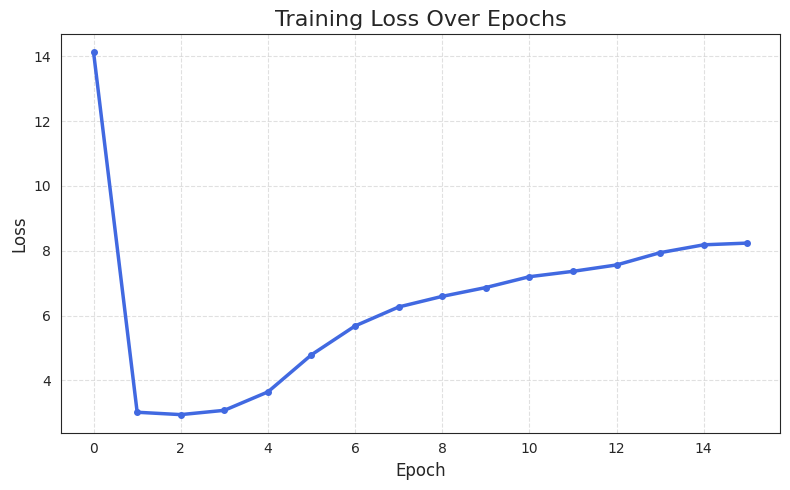

In [ ]:
plt.figure(figsize=(8, 5))

plt.plot(losses, color='royalblue', linewidth=2.5, marker='o', markersize=4)  # Smooth, readable line

plt.title('Training Loss Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.show()


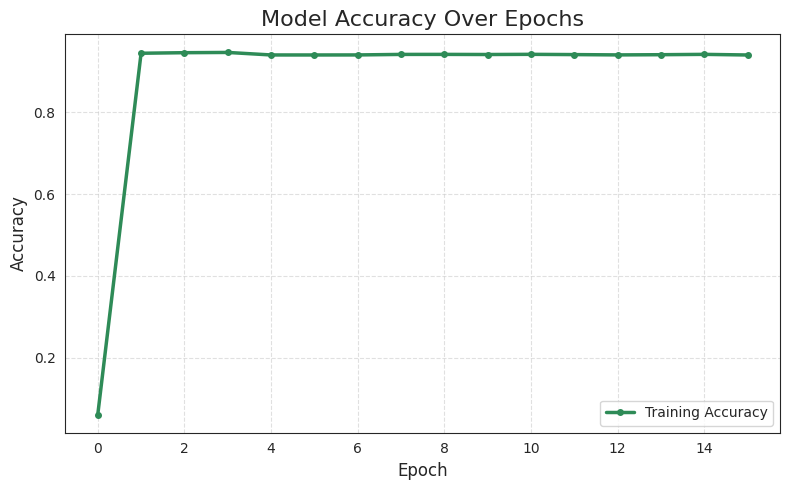

In [ ]:
plt.figure(figsize=(8, 5))

plt.plot(accs, color='seagreen', linewidth=2.5, marker='o', markersize=4, label='Training Accuracy')

plt.title('Model Accuracy Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(loc='lower right', fontsize=10)

plt.tight_layout()
plt.show()


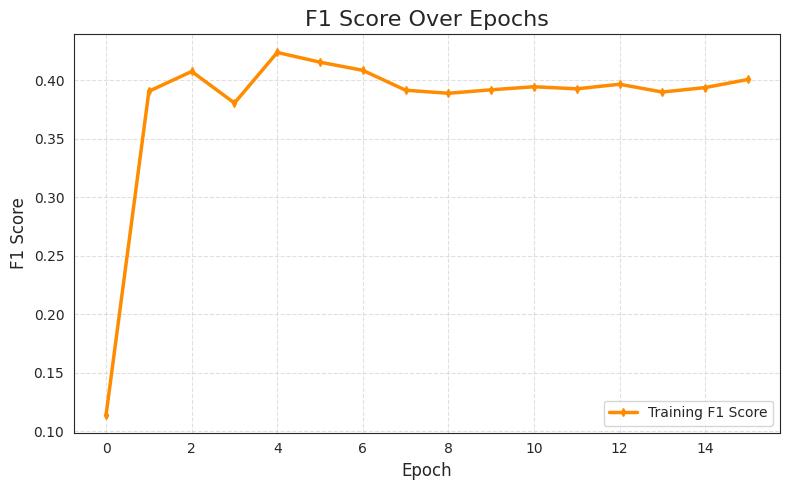

In [ ]:
plt.figure(figsize=(8, 5))

plt.plot(f1s, color='darkorange', linewidth=2.5, marker='d', markersize=4, label='Training F1 Score')

plt.title('F1 Score Over Epochs', fontsize=16)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('F1 Score', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.legend(loc='lower right', fontsize=10)

plt.tight_layout()
plt.show()


## Make Predictions on Example Data

In [ ]:
small_df = raw_df.sample(10)

In [ ]:
small_df

,qid,question_text,target,char_count,word_count,question_mark
887497,ade162d07749e6c1fc26,Why I should share equal percentage with my pa...,0,246,42,True
48567,0983cea9b5466f1feeff,How can girls be so heartless?,1,30,6,True
587654,731f575e7974f293c9b9,What is cogging?,0,16,3,True
356845,45f292ec44c77f8eb24a,Why has India not been able to create the requ...,0,78,15,True
827094,a217c6fa67b75c32e4dc,"For using raw cabbage juice to heal ulcers, is...",0,88,18,True
420995,528296c46e15a4a6daf8,What is the best cure for internal piles?,0,41,8,True
794014,9b956ebd1cdba45e1b05,"If people were made of iron, how would murder ...",0,69,12,True
914764,b33e4ff7d36c0810b645,What’s the difference between differentiating ...,0,73,9,True
1297181,fe3ca4f9c5d3a0ad9e72,Do we all have to make sacrifices?,0,34,7,True
724636,8de0159c9931e7aa05e9,What are the websites/apps to earn free bitcoi...,0,61,10,True


In [ ]:
def predict_df(df):
  inputs = vectorizer.transform(df.question_text)
  input_tensors = torch.tensor(inputs.toarray()).float()
  outputs = model(input_tensors)
  probs = torch.sigmoid(outputs[:,0])
  preds = (probs > 0.5).int()
  return preds

In [ ]:
# predictions
predict_df(small_df)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=torch.int32)

In [ ]:
# actual values
small_df.target.values

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
small_df.question_text.values

array(['Why I should share equal percentage with my partners in my three partner technology company in which I fully developed the product and work as full time without any salary whereas my one partner is doing marketing part time, another nothing much?',
       'How can girls be so heartless?', 'What is cogging?',
       'Why has India not been able to create the required jobs, for all its citizens?',
       'For using raw cabbage juice to heal ulcers, is it better to have it on an empty stomach?',
       'What is the best cure for internal piles?',
       'If people were made of iron, how would murder be treated differently?',
       'What’s the difference between differentiating and finding the derivative?',
       'Do we all have to make sacrifices?',
       'What are the websites/apps to earn free bitcoin and litecoin?'],
      dtype=object)

In [ ]:
small_df.question_text[:10]

,question_text
887497,Why I should share equal percentage with my pa...
48567,How can girls be so heartless?
587654,What is cogging?
356845,Why has India not been able to create the requ...
827094,"For using raw cabbage juice to heal ulcers, is..."
420995,What is the best cure for internal piles?
794014,"If people were made of iron, how would murder ..."
914764,What’s the difference between differentiating ...
1297181,Do we all have to make sacrifices?
724636,What are the websites/apps to earn free bitcoi...


In [ ]:
small_df.iloc[9]["question_text"]


'What are the websites/apps to earn free bitcoin and litecoin?'

In [ ]:
small_df.iloc[4]["question_text"]

'For using raw cabbage juice to heal ulcers, is it better to have it on an empty stomach?'

In [ ]:
small_df.iloc[1]["question_text"]

'How can girls be so heartless?'

In [ ]:
def predict_text(text):
  df = pd.DataFrame({'question_text': [text]})
  inputs = vectorizer.transform(df.question_text)
  input_tensors = torch.tensor(inputs.toarray()).float()
  outputs = model(input_tensors)
  probs = torch.sigmoid(outputs[:,0])
  preds = (probs > 0.5).int()
  return preds

In [ ]:
predict_text('what is the function of a plasma cell?')

tensor([0], dtype=torch.int32)

In [ ]:
predict_text('why cant liberals realize that they are stupid??')

tensor([1], dtype=torch.int32)

In [ ]:
predict_text('')

tensor([1], dtype=torch.int32)

In [ ]:
predict_text('How does photosynthesis work in plants?')

tensor([0], dtype=torch.int32)

In [ ]:
predict_text('Is the moon landing actually fake?')

tensor([0], dtype=torch.int32)

In [ ]:
predict_text('When will people stop being so dumb about climate change?')

tensor([0], dtype=torch.int32)

In [ ]:
predict_text('Why is the government hiding the truth about aliens?')

tensor([0], dtype=torch.int32)

In [ ]:
predict_text('Why do conservatives always ignore facts?')

tensor([1], dtype=torch.int32)

In [ ]:
predict_text('Is it possible for flat-earthers to ever use common sense?')

tensor([0], dtype=torch.int32)

In [ ]:
predict_text("Why do idiots still believe in climate change?")

tensor([0], dtype=torch.int32)

In [ ]:
predict_text('why cant people from west realize that they are selfish??')

tensor([1], dtype=torch.int32)

## Generate Predictions for the Test Set

In [ ]:
test_inputs

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2056486 stored elements and shape (375806, 1000)>

In [ ]:
import numpy as np
import torch

def make_preds(dl):
    all_preds = []
    model.eval()
    with torch.no_grad():
        for batch in dl:
            inputs = batch[0]
            outputs = model(inputs)  # Use batch inputs here
            probs = torch.sigmoid(outputs[:, 0])
            preds = (probs > 0.5).int()
            all_preds.append(preds.cpu().numpy())  # Move to CPU if using GPU
    return np.concatenate(all_preds)


In [ ]:
test_inputs.shape

(375806, 1000)

In [ ]:
test_preds = make_preds(test_dl)

In [ ]:
test_inputs.shape

(375806, 1000)

In [ ]:
test_preds.shape

(375806,)

In [ ]:
test_preds

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
len(test_preds)

375806

In [ ]:
pd.Series(test_preds).value_counts()

,count
0,359838
1,15968


In [ ]:
(4144/(4144+65856))*100

5.92

In [ ]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [ ]:
len(sub_df)

375806

In [ ]:
len(test_preds)

375806

In [ ]:

sub_df.prediction = test_preds

In [ ]:
sub_df.prediction.value_counts()

,count
prediction,
0,359838
1,15968


In [ ]:
sub_df.to_csv('submission.csv', index = None)